In [1]:
import os
import sys
import numpy as np
import pandas as pd
import pickle
import random
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import hinge_loss
from AEspeech import AEspeech
import pdb
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import joblib

C:\Users\Gabriel\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
PATH=os.getcwd()

mod="CAE"
rep='spec'

results_path=PATH+"/pdSpanish/classResults/svm/"+mod+'_'+rep+'Results.pkl'
results=pd.read_pickle(results_path)

In [5]:
UTTERS=['pataka','kakaka','pakata','papapa','petaka','tatata']
for utter in UTTERS:
    grid=joblib.load(PATH+"/pdSpanish/classResults/svm/params/"+mod+'_'+utter+'_'+rep+'Grid.pkl')
    print("The best parameters are for utterance: %s are %s with a score of %0.2f"
      % (utter, grid.best_params_, grid.best_score_))

The best parameters are for utterance: pataka are {'C': 11.006941712522098, 'degree': 1, 'gamma': 0.0001, 'kernel': 'rbf'} with a score of 0.73
The best parameters are for utterance: kakaka are {'C': 74.98942093324558, 'degree': 1, 'gamma': 6.812920690579608e-05, 'kernel': 'rbf'} with a score of 0.87
The best parameters are for utterance: pakata are {'C': 4.216965034285822, 'degree': 1, 'gamma': 4.641588833612772e-05, 'kernel': 'rbf'} with a score of 0.66
The best parameters are for utterance: papapa are {'C': 11.006941712522098, 'degree': 1, 'gamma': 1.4677992676220675e-05, 'kernel': 'rbf'} with a score of 0.69
The best parameters are for utterance: petaka are {'C': 4.216965034285822, 'degree': 1, 'gamma': 6.812920690579608e-05, 'kernel': 'rbf'} with a score of 0.70
The best parameters are for utterance: tatata are {'C': 2.610157215682537, 'degree': 1, 'gamma': 4.641588833612772e-05, 'kernel': 'rbf'} with a score of 0.67


In [6]:
results

,pataka,kakaka,pakata,papapa,petaka,tatata
train_acc,0.903333,0.958889,0.783333,0.784444,0.786667,0.794444
test_acc,0.76,0.81,0.62,0.65,0.62,0.66
bin_class,"{36: [0.20392298240385295, 0.7960770175961471]...","{37: [0.26921312410237075, 0.7307868758976293]...","{15: [0.41190543114225736, 0.5880945688577428]...","{15: [0.20946293707707495, 0.7905370629229252]...","{18: [0.4644763914615138, 0.5355236085384862],...","{15: [0.48522023280125137, 0.5147797671987486]..."
class_report,{0: ' precision recall f1-sco...,{0: ' precision recall f1-sco...,{0: ' precision recall f1-sco...,{0: ' precision recall f1-sco...,{0: ' precision recall f1-sco...,{0: ' precision recall f1-sco...


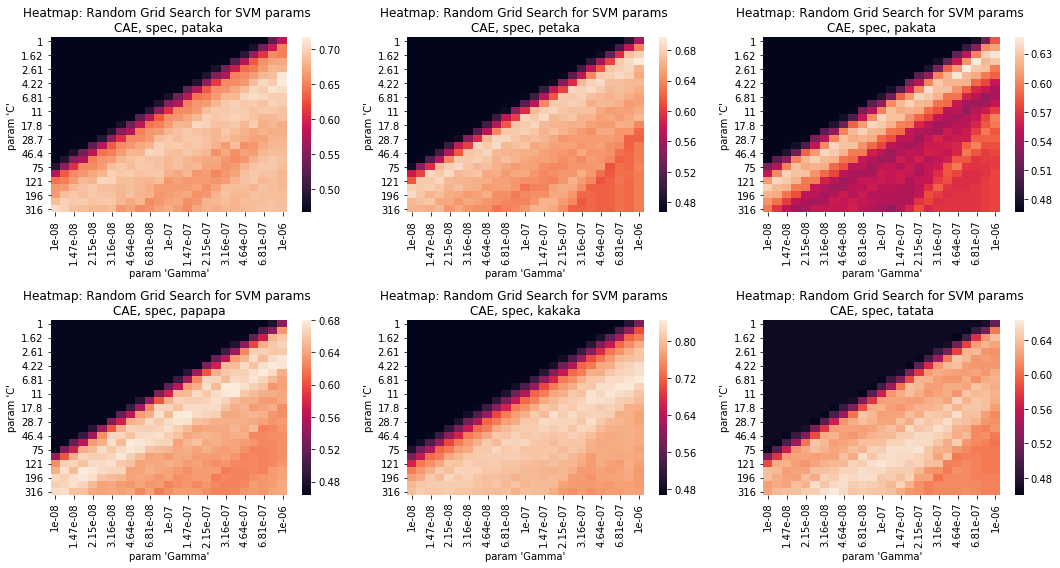

In [7]:
fig,ax=plt.subplots(2,3,figsize=(15,8))

for uItr,utter in enumerate(UTTERS):
    row_itr=np.mod(uItr,2)
    col_itr=np.mod(uItr,3)
    grid=joblib.load(PATH+"/pdSpanish/classResults/svm/params/"+mod+'_'+utter+'_'+rep+'Grid.pkl')
    pvt = pd.pivot_table(pd.DataFrame(grid.cv_results_),values='mean_test_score', index='param_C',columns='param_gamma')
    g = sns.heatmap(pvt,ax=ax[row_itr][col_itr])
    g.set_ylabel("param 'C'")
    g.set_xlabel("param 'Gamma'")
    g.set_title('Heatmap: Random Grid Search for SVM params \n'+mod+", "+rep+", "+utter)
    ylabels = ['{:,.3g}'.format(y) for y in pvt.index]
    g.set_yticklabels(ylabels)
    xlabels = ['{:,.3g}'.format(x) for x in pvt.columns]
    g.set_xticklabels(xlabels)

plt.tight_layout()

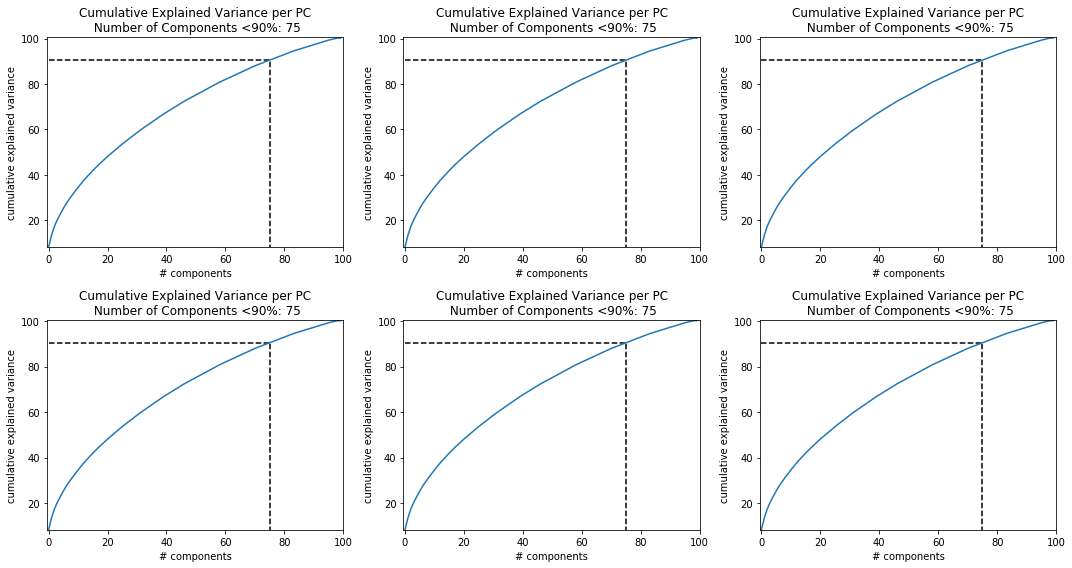

In [8]:
"""
ADD choice number of pcs (>90% cumultive variance) 
"""
fig,ax=plt.subplots(2,3,figsize=(15,8))

for uItr,utter in enumerate(UTTERS):
    row_itr=np.mod(uItr,2)
    col_itr=np.mod(uItr,3)
    pc_data=pd.read_pickle(PATH+"/pdSpanish/classResults/svm/params/"+mod+'_'+utter+'_'+rep+'_pc.pkl')
    x=min(np.where(pc_data.loc['pc_var']['pataka']>90)[0])
    y=pc_data.loc['pc_var']['pataka'][x]
    
    ax[row_itr][col_itr].plot(pc_data.loc['pc_var']['pataka'])
    ax[row_itr][col_itr].vlines(x, 0, y, linestyle="dashed")
    ax[row_itr][col_itr].hlines(y, 0, x, linestyle="dashed")
    ax[row_itr][col_itr].set_title("Cumulative Explained Variance per PC\n Number of Components <90%: "+str(x))
    ax[row_itr][col_itr].set_xlabel("# components")
    ax[row_itr][col_itr].set_ylabel("cumulative explained variance")
    ax[row_itr][col_itr].set_xlim([-.5, 100])
    ax[row_itr][col_itr].set_ylim([min(pc_data.loc['pc_var']['pataka']), 100.5])
    
plt.tight_layout()

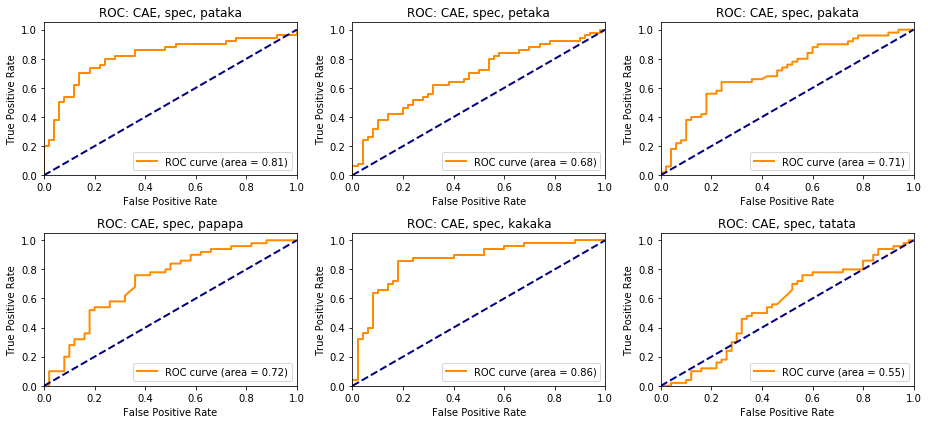

In [9]:
y_scores=np.zeros((100*len(UTTERS),2))
y_tests=np.zeros((100*len(UTTERS),2))
y_score=np.zeros((100,2))
y_test=np.zeros((100,2))
num_pdHc_tests=4 #must be even (same # of test pds and hcs per iter)
                  
fig,ax=plt.subplots(2,3,figsize=(13, 6))
for uItr,utter in enumerate(UTTERS):
    y_score=np.zeros((100,2))
    y_test=np.zeros((100,2))
    
    for j in range(100):
        y_score[j]+=np.array(list((results[utter]['bin_class'].values()))[j])
        if np.mod(j,2)==0:
            y_test[j,:]=np.vstack((np.zeros(1),np.ones(1))).T
        if np.mod(j,2)==1:
            y_test[j,:]=np.vstack((np.ones(1),np.zeros(1))).T
    
    y_scores[uItr*100:(uItr+1)*100]=y_score
    y_tests[uItr*100:(uItr+1)*100]=y_test
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    lw = 2
    mgc=1
    row_itr=np.mod(uItr,2)
    col_itr=np.mod(uItr,3)
    ax[row_itr][col_itr].plot(fpr[mgc], tpr[mgc], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[mgc])
    ax[row_itr][col_itr].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax[row_itr][col_itr].set_xlim([0.0, 1.0])
    ax[row_itr][col_itr].set_ylim([0.0, 1.05])
    ax[row_itr][col_itr].set_xlabel('False Positive Rate')
    ax[row_itr][col_itr].set_ylabel('True Positive Rate')
    ax[row_itr][col_itr].set_title('ROC: '+mod+", "+rep+", "+utter)
    ax[row_itr][col_itr].legend(loc="lower right")
#     plt.show()
plt.tight_layout()


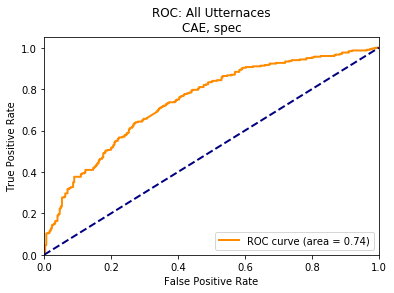

In [10]:
fpr=dict()
tpr=dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(np.array(y_tests[:, i]), np.array(y_scores[:, i]))
    roc_auc[i] = auc(fpr[i], tpr[i])

lw = 2
mgc=1
plt.plot(fpr[mgc], tpr[mgc], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[mgc])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC: All Utternaces\n'+mod+", "+rep)
plt.legend(loc="lower right")

In [11]:
PATH=os.getcwd()

mod="CAE"
rep='spec'
aggResultsPath=PATH+"/pdSpanish/classResults/svm/"+mod+'_'+rep+'_aggResults.pkl'
aggResults=pd.read_pickle(aggResultsPath)

FileNotFoundError: [Errno 2] No such file or directory: "C:\\Users\\Gabriel\\Master's Thesis\\aeternaSpeech\\code\\speechRepAnalysis/pdSpanish/classResults/svm/CAE_spec_aggResults.pkl"

In [12]:
UTTERS=['pataka','kakaka','pakata','papapa','petaka','tatata']

grid=joblib.load(PATH+"/pdSpanish/classResults/svm/params/"+mod+'_'+rep+'aggGrid.pkl')
print("The best parameters are: %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are: {'C': 2.610157215682537, 'degree': 1, 'gamma': 0.0001, 'kernel': 'rbf'} with a score of 0.79


In [ ]:
grid=joblib.load(PATH+"/pdSpanish/classResults/svm/params/"+mod+'_'+rep+'aggGrid.pkl')
pvt = pd.pivot_table(pd.DataFrame(grid.cv_results_),values='mean_test_score', index='param_C',columns='param_gamma')
g = sns.heatmap(pvt)
g.set_ylabel("param 'C'")
g.set_xlabel("param 'Gamma'")
g.set_title('Heatmap: Random Grid Search for SVM params \n'+mod+", "+rep)
ylabels = ['{:,.3g}'.format(y) for y in pvt.index]
g.set_yticklabels(ylabels)
xlabels = ['{:,.3g}'.format(x) for x in pvt.columns]
g.set_xticklabels(xlabels)


In [ ]:
aggResults